Plot vertical temperature profile from NCEP reanalysis data. xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here:
Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis2.derived/LTMs/pressure/catalog.html

Data server catalog for all NOAA data:
https://psl.noaa.gov/thredds/catalog/catalog.html

In [63]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/pressure/air.mon.ltm.nc'
with xr.open_dataset(file1) as ds1:
    print(ds1)
ta=ds1.air-273.15 # from K to oC

file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.derived/LTMs/pressure/rhum.mon.ltm.nc'
with xr.open_dataset(file2) as ds2:
    print(ds2)
rh=ds2.rhum/100.  # from % to fraction

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:         

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    rhum                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:         

MetPy is a collection of tools in Python for reading, visualizing, and performing calculations with weather data.
https://unidata.github.io/MetPy/latest/index.html

In [77]:
import metpy
from metpy.calc import saturation_vapor_pressure
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units

In [80]:
# caluate vapor pressure.
# First calculate saturation vapor pressure
es = saturation_vapor_pressure(ta * units.degC)
# multipy relative humidity
e = es * rh

(1000.0, 0.0)

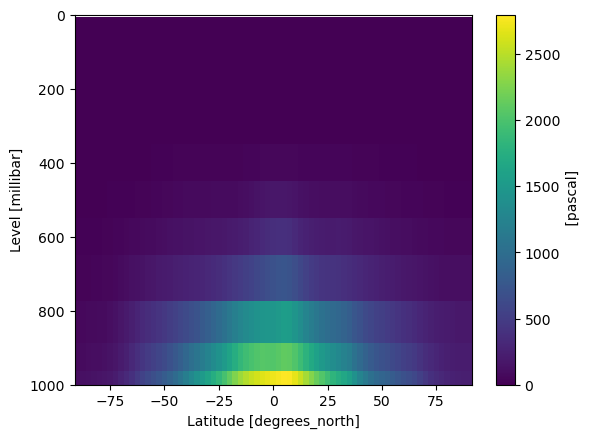

In [82]:
# Calculate time average and make a plot
e_ann = e.mean("time").mean("lon") # zonal and annual average
e_ann.plot()
plt.ylim(1000,0)

Calculate specific humidity

In [84]:
# First calculate dewpoint temperature.
td = dewpoint_from_relative_humidity(ta * units.degC, ds2.rhum * units.percent)
# Calculate specific humidity
q = specific_humidity_from_dewpoint(ds2.level , td)*1000.  # in g/kg

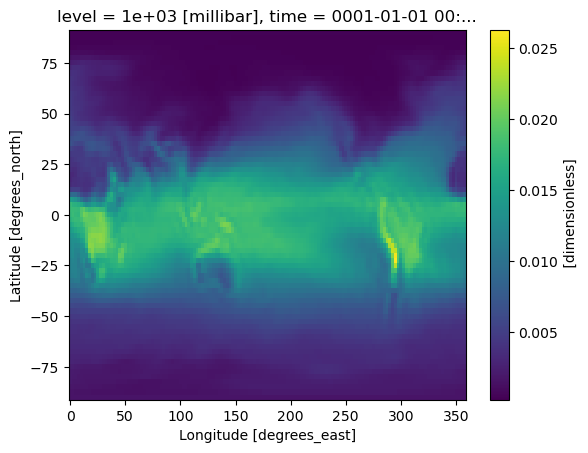

In [90]:
# January specific humidity at the lowest atmospheric level
q.isel(time=0).isel(level=0).plot()

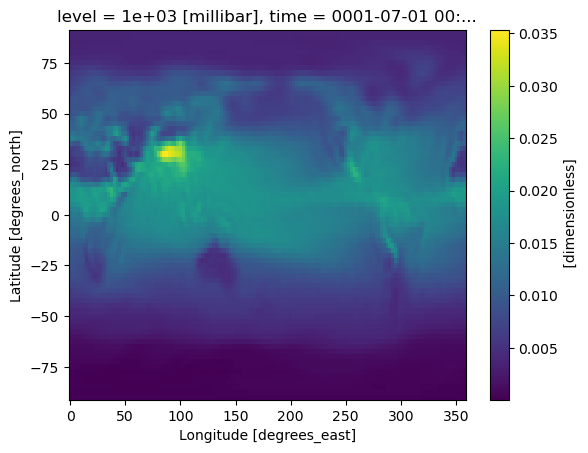

In [91]:
# July specific humidity at the lowest atmospheric level
q.isel(time=6).isel(level=0).plot()

(1000.0, 0.0)

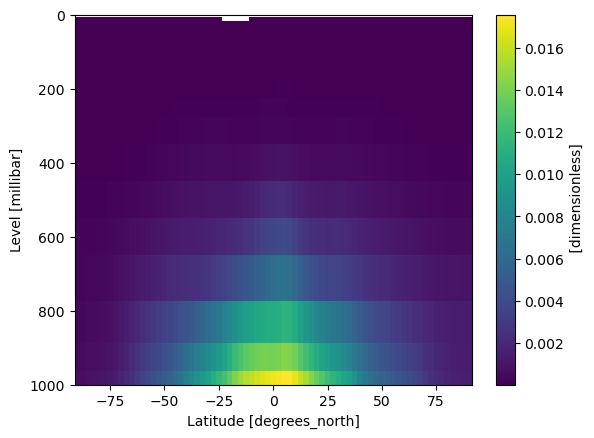

In [93]:
# Plot zonal and annual average vertical profile of specific humidity
q.mean(["time","lon"]).plot()
plt.ylim(1000,0)

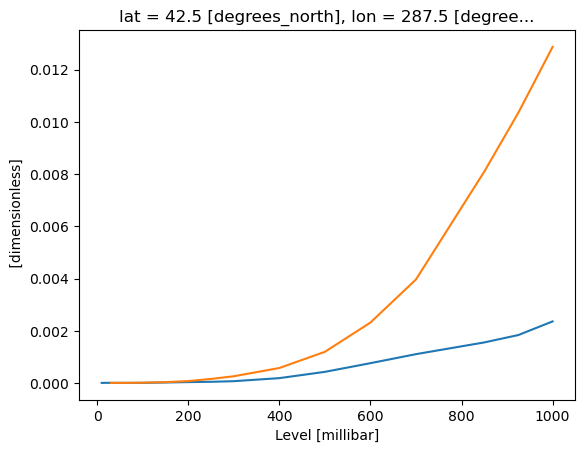

In [101]:
# Plot specific humidity profile in Providence
lat_pvd=41.8
lon_pvd=-71.4+360
qa_prov=q.sel(lat=lat_pvd,lon=lon_pvd , method='nearest')
qa_prov.isel(time=0).plot()
qa_prov.isel(time=6).plot()

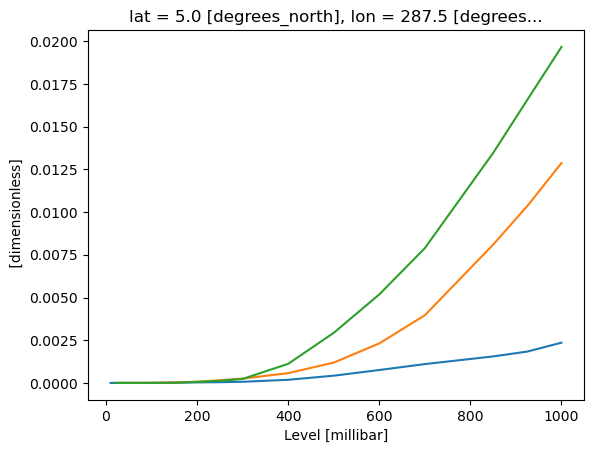

In [100]:
# Plot specific humidity profile in Providence and a tropical point
lat_pvd=41.8
lon_pvd=-71.4+360
qa_prov=q.sel(lat=lat_pvd,lon=lon_pvd , method='nearest')
qa_prov.isel(time=0).plot()
qa_prov.isel(time=6).plot()
lat_tp=5
lon_tp=-71.4+360
qa_tp=q.sel(lat=lat_tp,lon=lon_tp , method='nearest')
qa_tp.isel(time=6).plot()